In [ ]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
for i in range(len(glob("/content/train/*.jpg"))):
  print(i)
# Image.open('/content/train/*.jpg')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# กำหนดขนาดรูปภาพที่ต้องการ resize (300, 400)
size = (224, 224)

# กำหนด path ของโฟลเดอร์ที่เก็บรูปภาพ
path = "/content/train"

# วนลูปอ่านและ resize รูปภาพทุกภาพในโฟลเดอร์
for file_name in os.listdir(path):
    if file_name.endswith(".jpg") or file_name.endswith(".jpeg") or file_name.endswith(".png"):
        # อ่านรูปภาพ
        img = Image.open(os.path.join(path, file_name))

        # resize รูปภาพ
        img_resized = img.resize(size)

        # บันทึกรูปภาพที่ resize เรียบร้อยแล้ว
        img_resized.save(os.path.join(path, file_name))


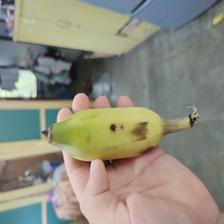

In [ ]:
Image.open(glob("/content/train/*.jpg")[1])

In [ ]:
img_df = pd.DataFrame(glob("/content/train/*.jpg"), columns=["path"])
img_df["id"] = img_df.path.map(lambda x: op.basename(x).replace(".jpg", ""))


label_df = pd.read_csv("/content/analysis.csv")
train_df = img_df.merge(label_df, on="id")

In [ ]:
img_df

,path,id
0,/content/train/IMG_20230621_175518.jpg,IMG_20230621_175518
1,/content/train/IMG_20230613_165918.jpg,IMG_20230613_165918
2,/content/train/1687023875054.jpg,1687023875054
3,/content/train/1687006654462.jpg,1687006654462
4,/content/train/1686827551903.jpg,1686827551903
...,...,...
730,/content/train/IMG_20230619_194537.jpg,IMG_20230619_194537
731,/content/train/IMG_20230613_164906.jpg,IMG_20230613_164906
732,/content/train/1686932012963.jpg,1686932012963
733,/content/train/IMG_20230621_174708.jpg,IMG_20230621_174708


In [ ]:
print("Number of test images = ", len(glob("/content/test/*.jpg")))
print("Number of train images = ", len(train_df))

Number of test images =  0
Number of train images =  1067


In [ ]:
train_df.head()

,path,id,state
0,/content/train/IMG_20230621_175518.jpg,IMG_20230621_175518,Lebmuernang_state4
1,/content/train/IMG_20230613_165918.jpg,IMG_20230613_165918,PisangAwake_state2
2,/content/train/1687023875054.jpg,1687023875054,PisangAwake_state4
3,/content/train/1687006654462.jpg,1687006654462,Lebmuernang_state2
4,/content/train/1687006654462.jpg,1687006654462,Lebmuernang_state2


In [ ]:
train_df.iterrows()

<generator object DataFrame.iterrows at 0x79b335f8bf40>

In [ ]:
root_dir = "/content/breed_state"
for _, r in train_df.iterrows():
    if not op.exists(f"{root_dir}/{r.state}"):
        os.makedirs(f"{root_dir}/{r.state}")
    shutil.copy(r.path, f"{root_dir}/{r.state}/{r.id}.jpg")

In [ ]:
# !rm -r ./train

rm: cannot remove './train': No such file or directory


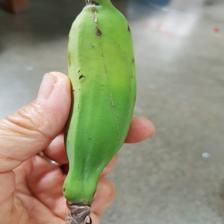

In [ ]:
Image.open("/content/train/1686825233472.jpg")

In [ ]:
# สำหรับคนที่ยังไม่ได้ลงไลบรารี่ fastbook ให้ uncomment บรรทัด !pip install
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.4 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
paths = get_image_files("/content/breed_state")

In [ ]:
paths[6]

Path('/content/breed_state/PisangAwake_state2/IMG_20230614_181224.jpg')

In [ ]:
parent_label(paths[6])

'PisangAwake_state2'

In [ ]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.3, seed=42), # GrandparentSplitter(valid_name='validation')
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [ ]:
get_image_files("/content/test")

(#80) [Path('/content/test/PisangAwake_state2/IMG_20230613_165750.jpg'),Path('/content/test/PisangAwake_state2/IMG_20230613_165909.jpg'),Path('/content/test/PisangAwake_state2/IMG_20230614_182309.jpg'),Path('/content/test/PisangAwake_state2/IMG_20230613_164733.jpg'),Path('/content/test/PisangAwake_state2/IMG_20230614_183013.jpg'),Path('/content/test/PisangAwake_state2/IMG_20230613_171147.jpg'),Path('/content/test/PisangAwake_state2/IMG_20230613_170837.jpg'),Path('/content/test/PisangAwake_state2/IMG_20230613_164107.jpg'),Path('/content/test/PisangAwake_state2/IMG_20230614_182338.jpg'),Path('/content/test/PisangAwake_state2/IMG_20230614_182035.jpg')...]

In [ ]:
parent_label("/content/test/001.jpg")

'test'

In [ ]:
dls = fields.dataloaders("/content/breed_state/", bs=6)

In [ ]:
len(dls.vocab)

8

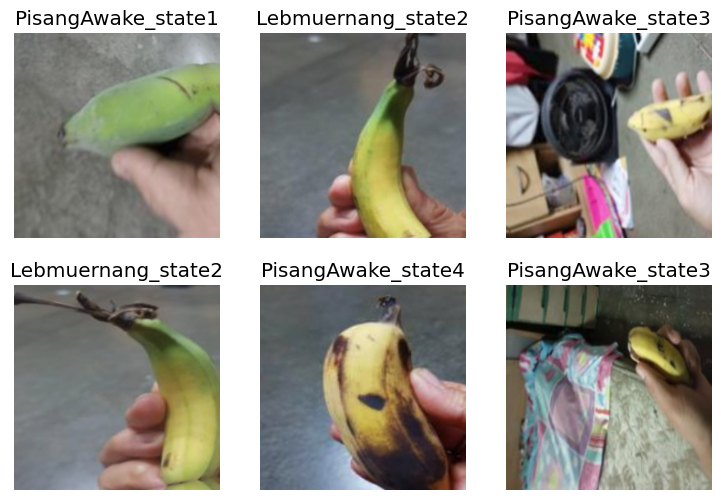

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
learner = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 122MB/s]


SuggestedLRs(valley=0.002511886414140463)

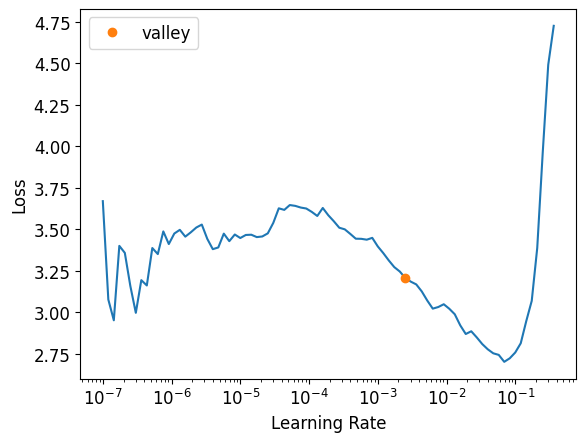

In [ ]:
learner.lr_find()

In [ ]:
learner.fine_tune(epochs=20, freeze_epochs=1, base_lr=0.002)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.877805,0.740274,0.250000,0.750000,03:52


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.099205,0.606102,0.190909,0.809091,05:47
1,0.915686,0.568706,0.204545,0.795455,05:47
2,0.821330,0.654729,0.200000,0.800000,05:49
3,0.812541,0.504690,0.145455,0.854545,05:47
4,0.739863,0.523875,0.163636,0.836364,05:49
5,0.776673,0.676790,0.190909,0.809091,05:47
6,0.695095,0.444080,0.168182,0.831818,05:48
7,0.641092,0.565614,0.159091,0.840909,05:51
8,0.620937,0.641228,0.181818,0.818182,05:47
9,0.474219,0.496837,0.136364,0.863636,05:48


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.099205,0.606102,0.190909,0.809091,05:47
1,0.915686,0.568706,0.204545,0.795455,05:47
2,0.821330,0.654729,0.200000,0.800000,05:49
3,0.812541,0.504690,0.145455,0.854545,05:47
4,0.739863,0.523875,0.163636,0.836364,05:49
5,0.776673,0.676790,0.190909,0.809091,05:47
6,0.695095,0.444080,0.168182,0.831818,05:48
7,0.641092,0.565614,0.159091,0.840909,05:51
8,0.620937,0.641228,0.181818,0.818182,05:47
9,0.474219,0.496837,0.136364,0.863636,05:48


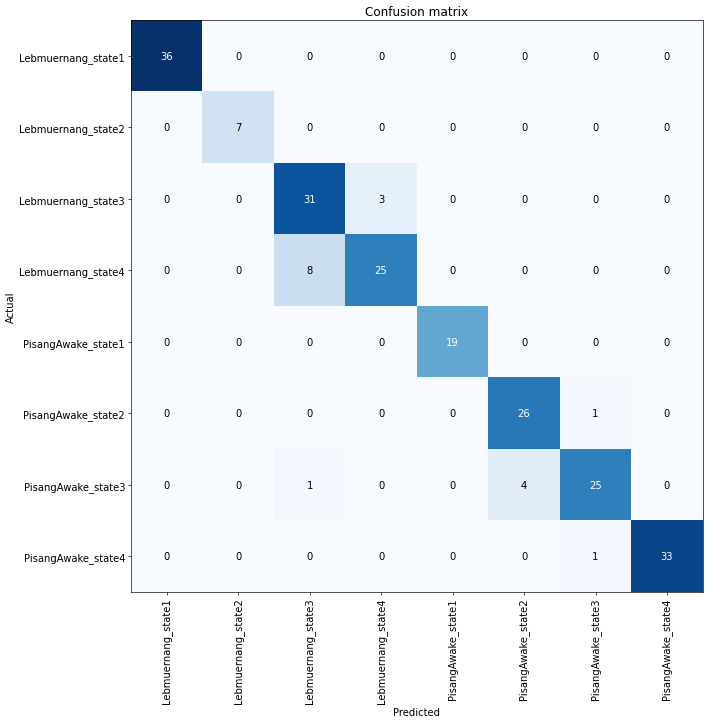

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('Lebmuernang_state4', 'Lebmuernang_state3', 8),
 ('PisangAwake_state3', 'PisangAwake_state2', 4),
 ('Lebmuernang_state3', 'Lebmuernang_state4', 3)]

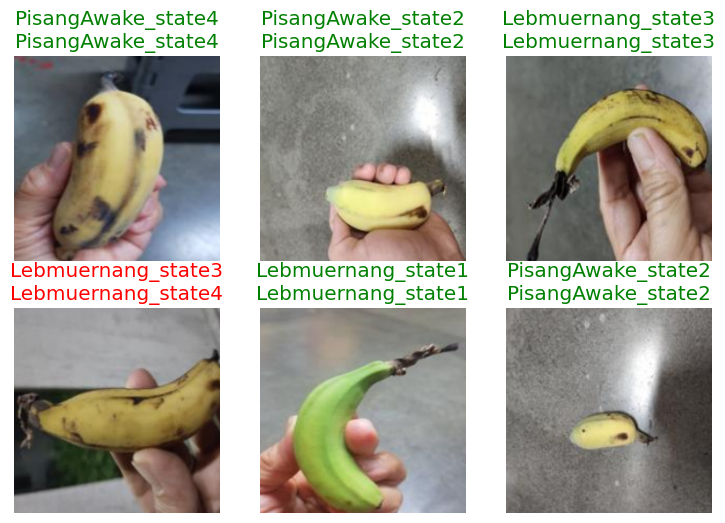

In [ ]:
learner.show_results(shuffle=True)

In [ ]:
learner.export("1_resnet34.pkl")

In [ ]:
from fastbook import *
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

learn_inf = load_learner('1_resnet34.pkl')

In [ ]:
# กำหนดขนาดรูปภาพที่ต้องการ resize
size = (224, 224)

# กำหนด path ของโฟลเดอร์ที่เก็บรูปภาพ
path = "/content/test/PisangAwake_state4"

# วนลูปอ่านและ resize รูปภาพทุกภาพในโฟลเดอร์
for file_name in os.listdir(path):
    if file_name.endswith(".jpg") or file_name.endswith(".jpeg") or file_name.endswith(".png"):
        # อ่านรูปภาพ
        img = Image.open(os.path.join(path, file_name))

        # resize รูปภาพ
        img_resized = img.resize(size)

        # บันทึกรูปภาพที่ resize เรียบร้อยแล้ว
        img_resized.save(os.path.join(path, file_name))

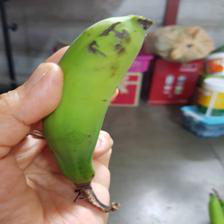

In [ ]:
Image.open("/content/test/state1/1686825233671.jpg").resize((224, 224))

In [ ]:
import os

path = '/content/test/state1'

for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    if os.path.isfile(file_path):  # Check if the path is a file
        print(filename)
        print(learn_inf.predict(file_path))




# path = "/content/test"
# for filename in os.listdir(path):
#     print(filename)
#     print(learn_inf.predict(f"/content/test/{filename}"))

# # for i in range(10):
# #   get_image_files("/content/test")

# learn_inf.predict("/content/test/001.jpg")

1686827523003.jpg


('state1', tensor(0), tensor([9.9998e-01, 1.9261e-05, 2.8425e-06, 3.0708e-07]))
1686825244925.jpg


('state1', tensor(0), tensor([9.9987e-01, 4.6744e-05, 9.9204e-07, 8.0994e-05]))
1686825251621.jpg


('state1', tensor(0), tensor([9.9969e-01, 7.3754e-05, 4.1946e-07, 2.3084e-04]))
1686827523360.jpg


('state1', tensor(0), tensor([9.9937e-01, 8.9900e-06, 4.5492e-12, 6.2047e-04]))
1686827543795.jpg


('state1', tensor(0), tensor([1.0000e+00, 2.8421e-07, 1.5280e-07, 3.0857e-07]))
1686825244642.jpg


('state1', tensor(0), tensor([9.9981e-01, 9.4078e-08, 1.8890e-04, 1.3427e-06]))
1686825239626.jpg


('state1', tensor(0), tensor([9.9992e-01, 6.6434e-05, 5.7491e-09, 1.4284e-05]))
1686825244787.jpg


('state1', tensor(0), tensor([9.9908e-01, 8.4570e-04, 3.4678e-05, 3.8939e-05]))
1686825250717.jpg


('state1', tensor(0), tensor([9.9079e-01, 9.0796e-03, 1.7358e-08, 1.2917e-04]))
1686825233671.jpg


('state1', tensor(0), tensor([9.9998e-01, 8.4262e-06, 5.0289e-07, 1.4609e-05]))


In [ ]:
learn_inf.predict("/content/test/state1/IMG_20230612_170341.jpg")
# learn_inf.predict("/content/test/state_2/m3_01b.jpg")[2][1]

('State1', tensor(0), tensor([9.9991e-01, 7.9795e-05, 6.0986e-06, 1.3894e-06]))

In [ ]:
!rm -r ./test/test_3.zip

In [ ]:
from tqdm import tqdm
label = []
prediction = []
import glob

for filename in tqdm(glob.glob("/content/test/*/*.jpg")):
  rename = filename.split("/")[3]
  label.append(rename)
  classes,_,_ = learn_inf.predict(filename)
  prediction.append(classes)


  0%|          | 0/80 [00:00<?, ?it/s]

  1%|▏         | 1/80 [00:00<00:28,  2.73it/s]

  2%|▎         | 2/80 [00:00<00:28,  2.76it/s]

  4%|▍         | 3/80 [00:01<00:28,  2.75it/s]

  5%|▌         | 4/80 [00:01<00:26,  2.82it/s]

  6%|▋         | 5/80 [00:01<00:26,  2.87it/s]

  8%|▊         | 6/80 [00:02<00:25,  2.93it/s]

  9%|▉         | 7/80 [00:02<00:24,  3.00it/s]

 10%|█         | 8/80 [00:02<00:24,  2.92it/s]

 11%|█▏        | 9/80 [00:03<00:24,  2.91it/s]

 12%|█▎        | 10/80 [00:03<00:23,  2.99it/s]

 14%|█▍        | 11/80 [00:03<00:22,  3.05it/s]

 15%|█▌        | 12/80 [00:04<00:22,  3.03it/s]

 16%|█▋        | 13/80 [00:04<00:22,  3.04it/s]

 18%|█▊        | 14/80 [00:04<00:19,  3.41it/s]

 19%|█▉        | 15/80 [00:04<00:17,  3.71it/s]

 20%|██        | 16/80 [00:05<00:16,  3.93it/s]

 21%|██▏       | 17/80 [00:05<00:15,  4.12it/s]

 22%|██▎       | 18/80 [00:05<00:14,  4.29it/s]

 24%|██▍       | 19/80 [00:05<00:14,  4.35it/s]

 25%|██▌       | 20/80 [00:05<00:13,  4.44it/s]

 26%|██▋       | 21/80 [00:06<00:13,  4.42it/s]

 28%|██▊       | 22/80 [00:06<00:12,  4.50it/s]

 29%|██▉       | 23/80 [00:06<00:12,  4.57it/s]

 30%|███       | 24/80 [00:06<00:12,  4.54it/s]

 31%|███▏      | 25/80 [00:07<00:12,  4.56it/s]

 32%|███▎      | 26/80 [00:07<00:11,  4.58it/s]

 34%|███▍      | 27/80 [00:07<00:11,  4.60it/s]

 35%|███▌      | 28/80 [00:07<00:11,  4.68it/s]

 36%|███▋      | 29/80 [00:07<00:10,  4.66it/s]

 38%|███▊      | 30/80 [00:08<00:10,  4.66it/s]

 39%|███▉      | 31/80 [00:08<00:10,  4.62it/s]

 40%|████      | 32/80 [00:08<00:10,  4.64it/s]

 41%|████▏     | 33/80 [00:08<00:09,  4.70it/s]

 42%|████▎     | 34/80 [00:08<00:09,  4.67it/s]

 44%|████▍     | 35/80 [00:09<00:09,  4.75it/s]

 45%|████▌     | 36/80 [00:09<00:09,  4.66it/s]

 46%|████▋     | 37/80 [00:09<00:09,  4.52it/s]

 48%|████▊     | 38/80 [00:09<00:09,  4.52it/s]

 49%|████▉     | 39/80 [00:10<00:08,  4.59it/s]

 50%|█████     | 40/80 [00:10<00:08,  4.57it/s]

 51%|█████▏    | 41/80 [00:10<00:08,  4.52it/s]

 52%|█████▎    | 42/80 [00:10<00:08,  4.53it/s]

 54%|█████▍    | 43/80 [00:10<00:08,  4.55it/s]

 55%|█████▌    | 44/80 [00:11<00:07,  4.50it/s]

 56%|█████▋    | 45/80 [00:11<00:07,  4.43it/s]

 57%|█████▊    | 46/80 [00:11<00:07,  4.45it/s]

 59%|█████▉    | 47/80 [00:11<00:07,  4.46it/s]

 60%|██████    | 48/80 [00:12<00:07,  4.46it/s]

 61%|██████▏   | 49/80 [00:12<00:06,  4.50it/s]

 62%|██████▎   | 50/80 [00:12<00:06,  4.52it/s]

 64%|██████▍   | 51/80 [00:12<00:06,  4.52it/s]

 65%|██████▌   | 52/80 [00:12<00:06,  4.48it/s]

 66%|██████▋   | 53/80 [00:13<00:06,  4.40it/s]

 68%|██████▊   | 54/80 [00:13<00:05,  4.42it/s]

 69%|██████▉   | 55/80 [00:13<00:05,  4.42it/s]

 70%|███████   | 56/80 [00:13<00:05,  4.50it/s]

 71%|███████▏  | 57/80 [00:14<00:05,  4.48it/s]

 72%|███████▎  | 58/80 [00:14<00:04,  4.48it/s]

 74%|███████▍  | 59/80 [00:14<00:04,  4.27it/s]

 75%|███████▌  | 60/80 [00:14<00:05,  3.76it/s]

 76%|███████▋  | 61/80 [00:15<00:05,  3.46it/s]

 78%|███████▊  | 62/80 [00:15<00:05,  3.19it/s]

 79%|███████▉  | 63/80 [00:15<00:05,  3.06it/s]

 80%|████████  | 64/80 [00:16<00:05,  2.98it/s]

 81%|████████▏ | 65/80 [00:16<00:05,  2.96it/s]

 82%|████████▎ | 66/80 [00:16<00:04,  3.00it/s]

 84%|████████▍ | 67/80 [00:17<00:04,  2.94it/s]

 85%|████████▌ | 68/80 [00:17<00:04,  2.92it/s]

 86%|████████▋ | 69/80 [00:18<00:03,  2.88it/s]

 88%|████████▊ | 70/80 [00:18<00:03,  2.87it/s]

 89%|████████▉ | 71/80 [00:18<00:03,  2.90it/s]

 90%|█████████ | 72/80 [00:19<00:02,  2.89it/s]

 91%|█████████▏| 73/80 [00:19<00:02,  2.90it/s]

 92%|█████████▎| 74/80 [00:19<00:02,  2.92it/s]

 94%|█████████▍| 75/80 [00:20<00:01,  2.94it/s]

 95%|█████████▌| 76/80 [00:20<00:01,  3.01it/s]

 96%|█████████▋| 77/80 [00:20<00:00,  3.04it/s]

 98%|█████████▊| 78/80 [00:21<00:00,  3.04it/s]

 99%|█████████▉| 79/80 [00:21<00:00,  3.05it/s]

100%|██████████| 80/80 [00:21<00:00,  3.68it/s]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(label,prediction, average="micro")

0.85

In [ ]:
print(len(label))
print(len(prediction))

40
40


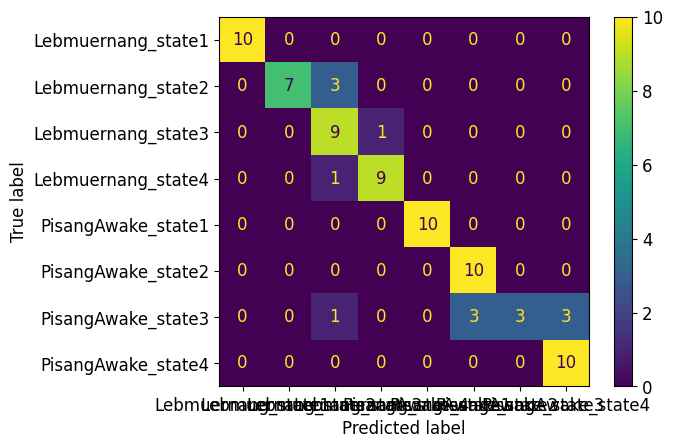

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(label, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.unique(prediction))

cm_display.plot()
plt.show()

In [ ]:
classes,_,_ = learner.predict("/content/test/state_1/t_01a.jpg")

In [ ]:
print(classes)

mayang_state_1


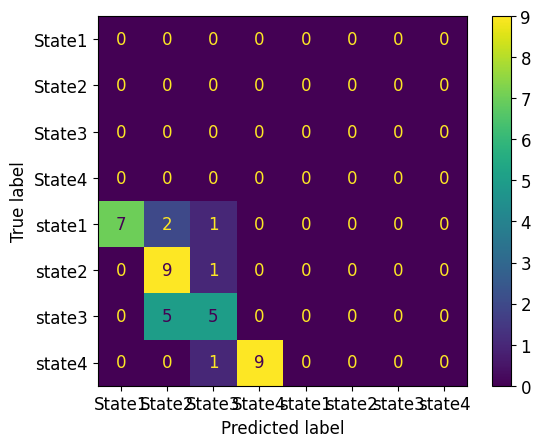

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(label, prediction)

# Get the unique labels from both the label and prediction
unique_labels = np.unique(np.concatenate((label, prediction)))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=unique_labels)

cm_display.plot()
plt.show()
